## 1671. Minimum Number of Removals to Make Mountain Array


#### Description:

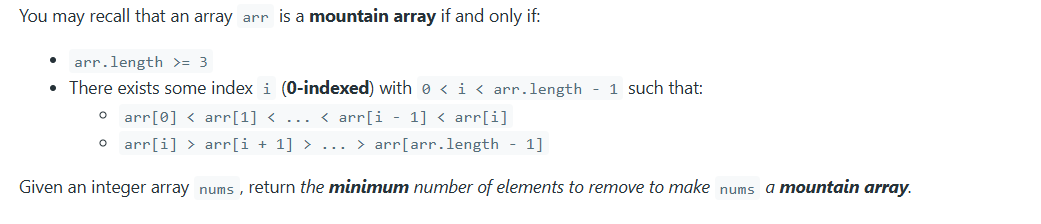

### Examples:

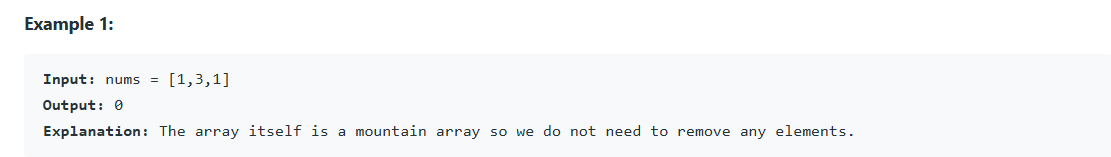

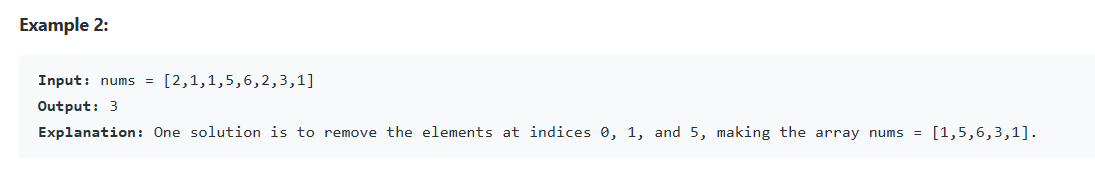

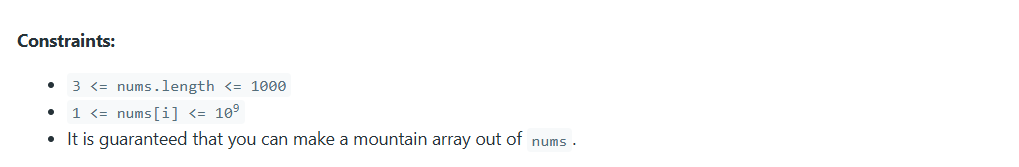

### Solution:

Solution 1: Using Binary Search

In [2]:
class Solution:
    def minimumMountainRemovals(self, nums: list[int]) -> int:
        left, right=0, len(nums)-1
        mid= (left+right)//2
        p1=mid-1
        p2=mid+1
        count=0
        while p1>left and p2<right:
            if nums[p1]>nums[mid]:
                count +=1
                p1-=1
            if nums[p2]>nums[mid]:
                count +=1
                p2+=1
        return count
        

In [ ]:
from bisect import bisect_left

class Solution:
    def minimumMountainRemovals(self, nums: list[int]) -> int:
        
        n = len(nums) 

        # find the increasing subsequence ends at i
        def subSequence(nums):
            seq = [0]*n
            st = []
            for i in range(n):
                if not st or nums[i]>st[-1]:
                    st.append(nums[i]) 
                    seq[i] = len(st) 
                else:
                    idx = bisect_left(st, nums[i]) # binary search
                    seq[i] = idx + 1
                    st[idx] = nums[i]
            return seq
        
        Iseq = subSequence(nums) # increasing subsequence
        Dseq = subSequence(nums[::-1]) # decreasing subsequence
        
        mountainLen = 0
        for i in range(n):
            if Iseq[i] == 1 or Dseq[n-i-1] == 1: continue # Since mountain must contains both sides /\, 1 means |\ or /|
            mountainLen = max(mountainLen, Iseq[i]+Dseq[n-i-1]-1) 
        
        return n - mountainLen